In [1]:
!pip install lightgbm

You are using pip version 9.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb


%matplotlib inline

In [3]:
train=pd.read_csv("C:/Users/yjp13/Desktop/2019-2nd-ml-month-with-kakr/train.csv")
test=pd.read_csv("C:/Users/yjp13/Desktop/2019-2nd-ml-month-with-kakr/test.csv")

In [50]:
y=train["price"]
del train["price"]

In [51]:
print(train.shape)
print(test.shape)

(15035, 20)
(6468, 20)


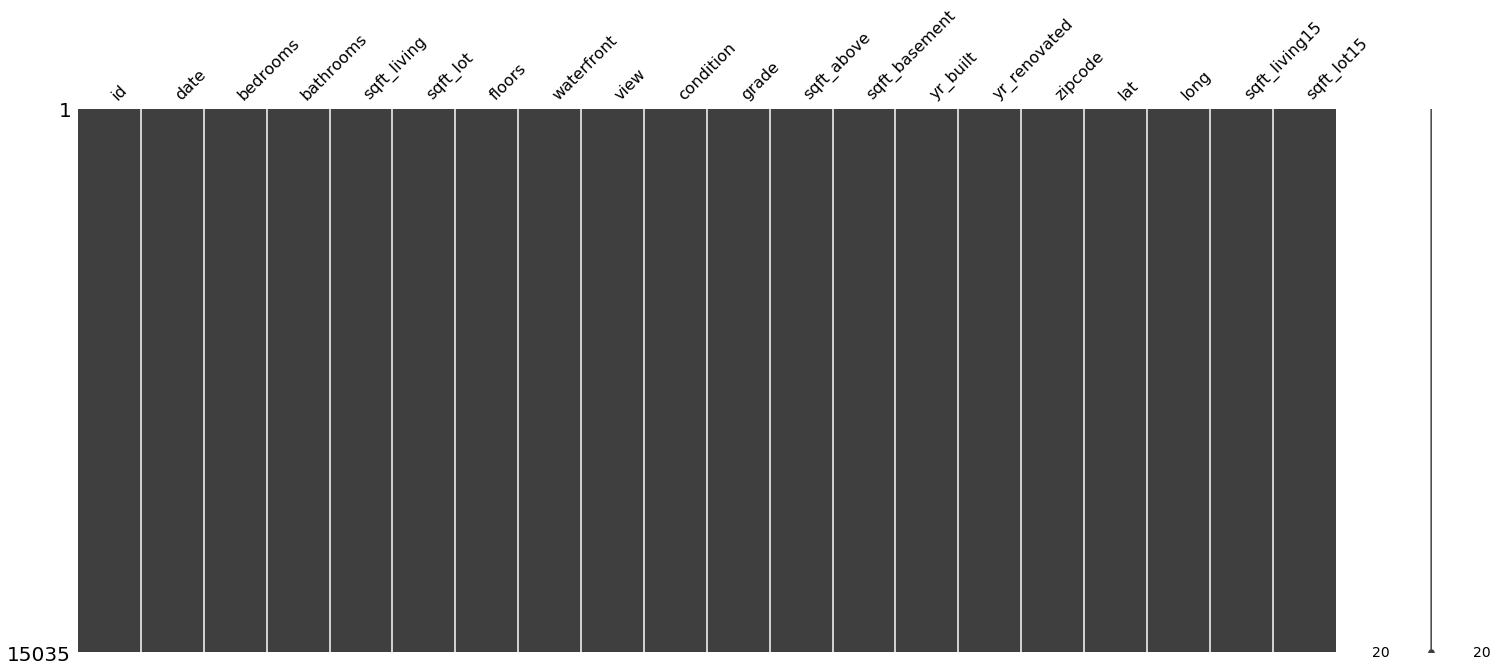

In [52]:
msno.matrix(train)

In [6]:
# pd.isnull(train).sum()

In [7]:
# pd.isnull(test).sum()

In [53]:
train.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

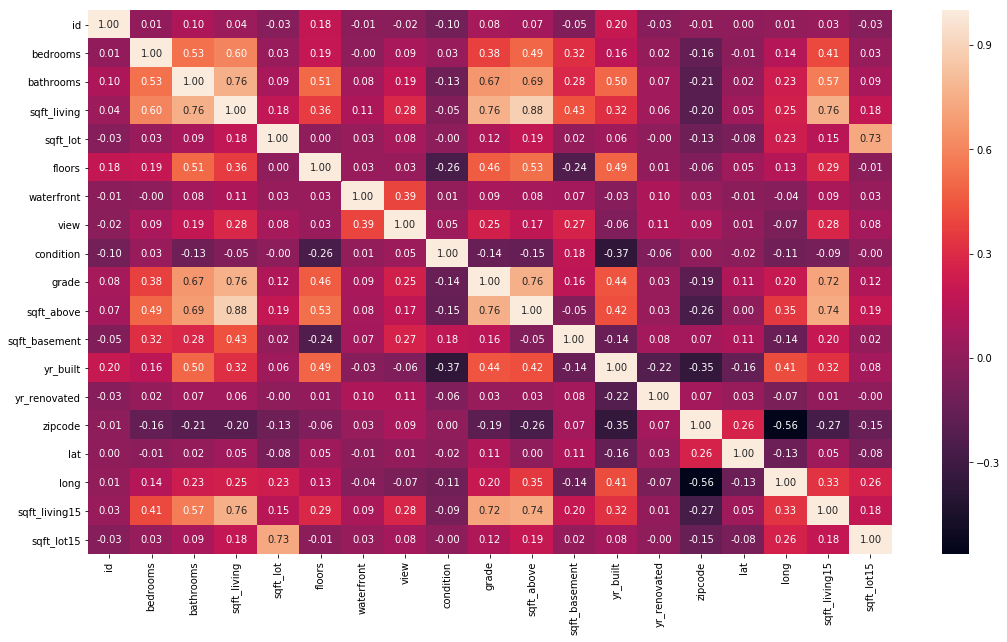

In [54]:
plt.figure(figsize=(18,10))
sns.heatmap(train.corr(),annot=True,fmt=".2f")

In [55]:
train.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,15035.000000,15035.000000,15035.000000,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000
mean,7517.000000,3.369139,2.115065,2083.790223,1.529697e+04,1.498071,0.007117,0.234253,3.406651,7.660725,1794.158164,289.632059,1971.100432,83.798936,98078.031726,47.560721,-122.213677,1992.754772,12823.884935
std,4340.374984,0.902721,0.767519,922.134087,4.261282e+04,0.538522,0.084063,0.763376,0.646505,1.179803,831.738609,440.663284,29.407612,400.398498,53.297815,0.138164,0.141294,691.456442,27736.259787
min,0.000000,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3758.500000,3.000000,1.750000,1430.000000,5.027500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.472700,-122.328000,1490.000000,5100.000000
50%,7517.000000,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.231000,1850.000000,7610.000000
75%,11275.500000,4.000000,2.500000,2560.000000,1.069550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2230.000000,550.000000,1997.000000,0.000000,98117.000000,47.678300,-122.126000,2360.000000,10076.000000
max,15034.000000,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 20 columns):
id               15035 non-null int64
date             15035 non-null object
bedrooms         15035 non-null int64
bathrooms        15035 non-null float64
sqft_living      15035 non-null int64
sqft_lot         15035 non-null int64
floors           15035 non-null float64
waterfront       15035 non-null int64
view             15035 non-null int64
condition        15035 non-null int64
grade            15035 non-null int64
sqft_above       15035 non-null int64
sqft_basement    15035 non-null int64
yr_built         15035 non-null int64
yr_renovated     15035 non-null int64
zipcode          15035 non-null int64
lat              15035 non-null float64
long             15035 non-null float64
sqft_living15    15035 non-null int64
sqft_lot15       15035 non-null int64
dtypes: float64(4), int64(15), object(1)
memory usage: 2.3+ MB


In [57]:
train_len=len(train)

In [58]:
data=pd.concat((train,test), axis=0)

In [59]:
data.shape

(21503, 20)

In [68]:
sub_id=data['id'][train_len:]
del data["id"]

data["date"]=data["date"].apply(lambda x: str(x[:6])).astype(str)

KeyError: 'id'

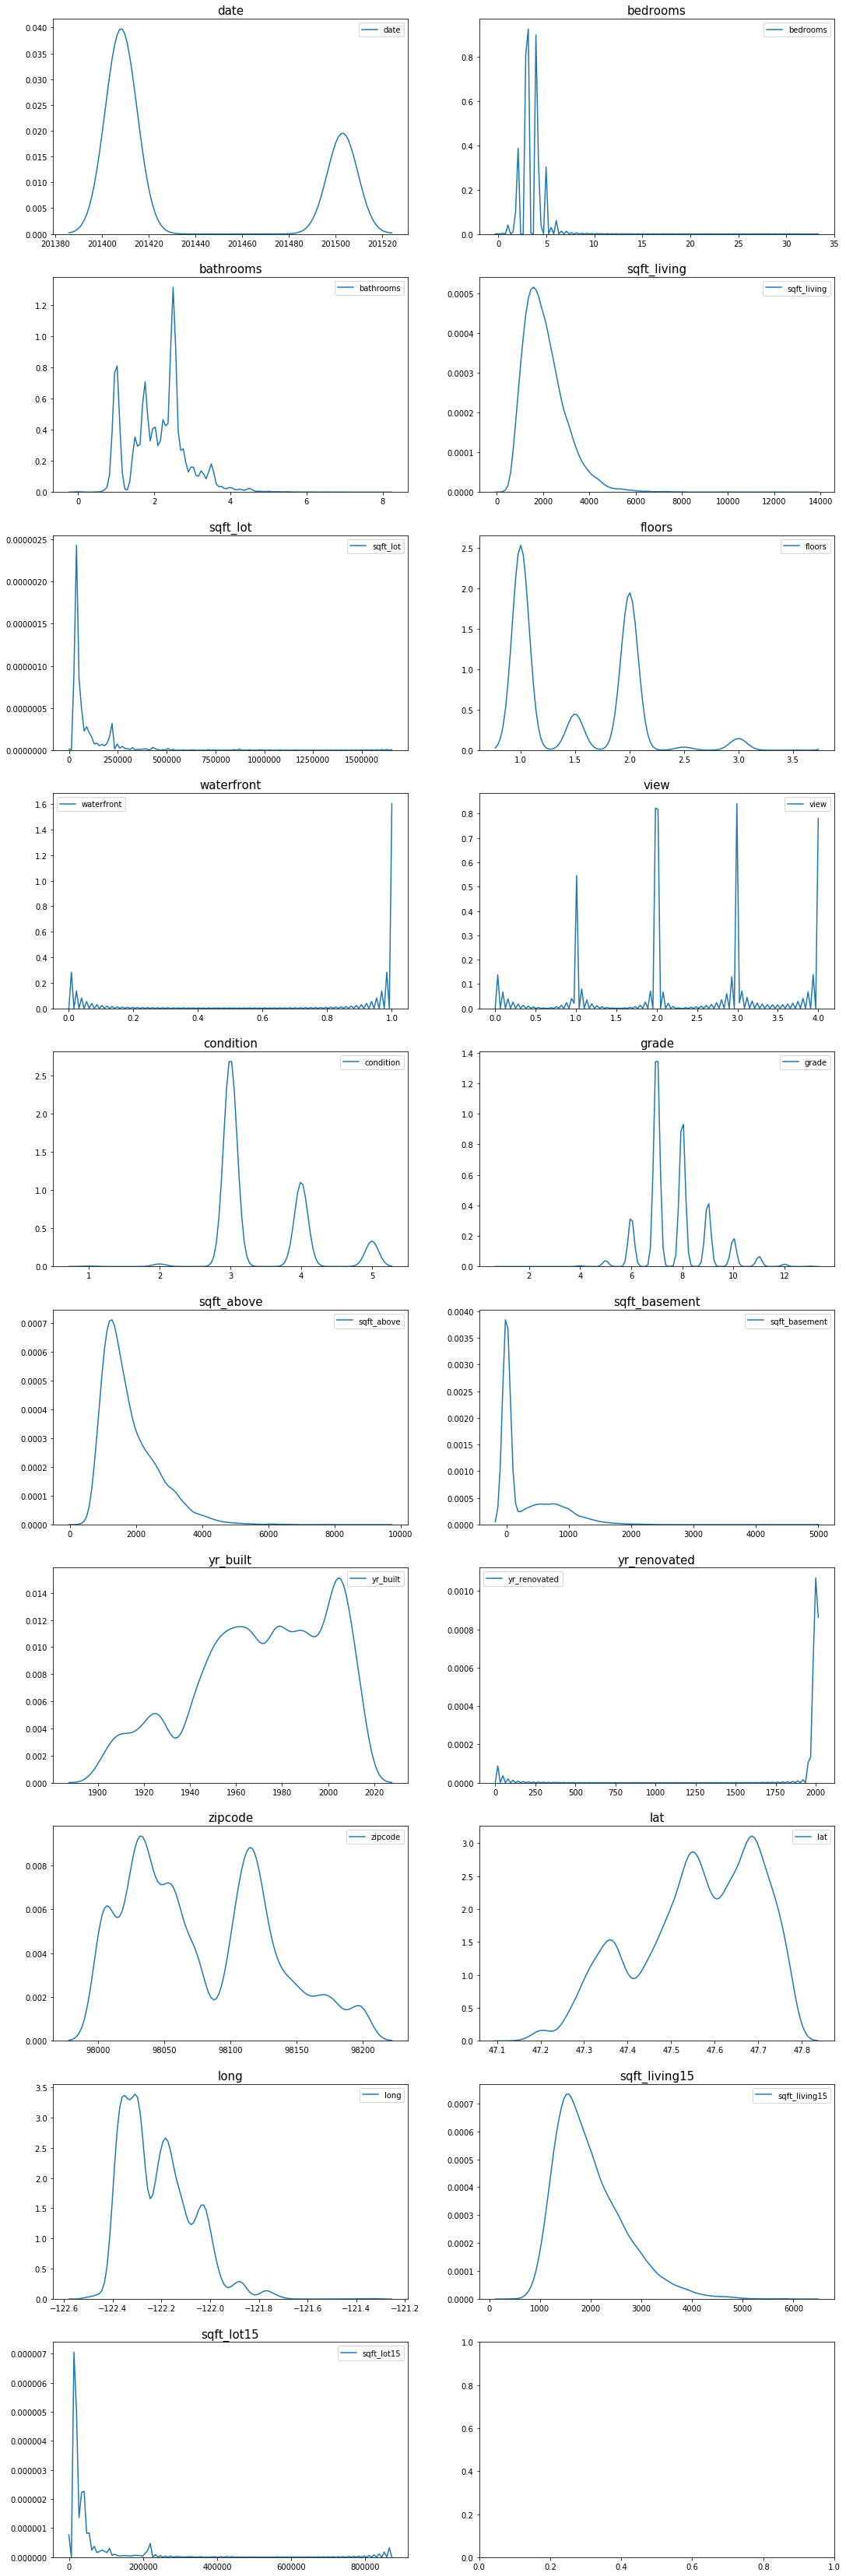

In [61]:
f, ax=plt.subplots(10, 2, figsize=(18, 60))

#id 변수 제외하고 분포를 확인
count =0 
columns=data.columns
for row in range(10):
    for col in range(2):
        sns.kdeplot(data[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count+=1
        if count==19:
            break

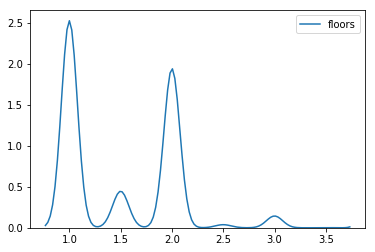

In [26]:
sns.kdeplot(data[columns[4]])

In [28]:
skew_columns=['bedrooms','sqft_above','sqft_living','sqft_lot','sqft_basement']

In [31]:
for c in skew_columns:
    data[c]= np.log(data[c].values)

C:\Users\yjp13\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


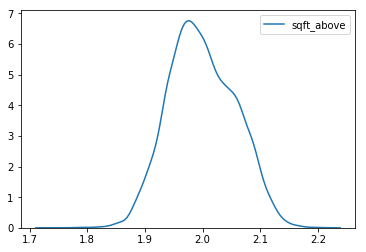

In [33]:
sns.kdeplot(data[skew_columns[1]])

C:\Users\yjp13\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\yjp13\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


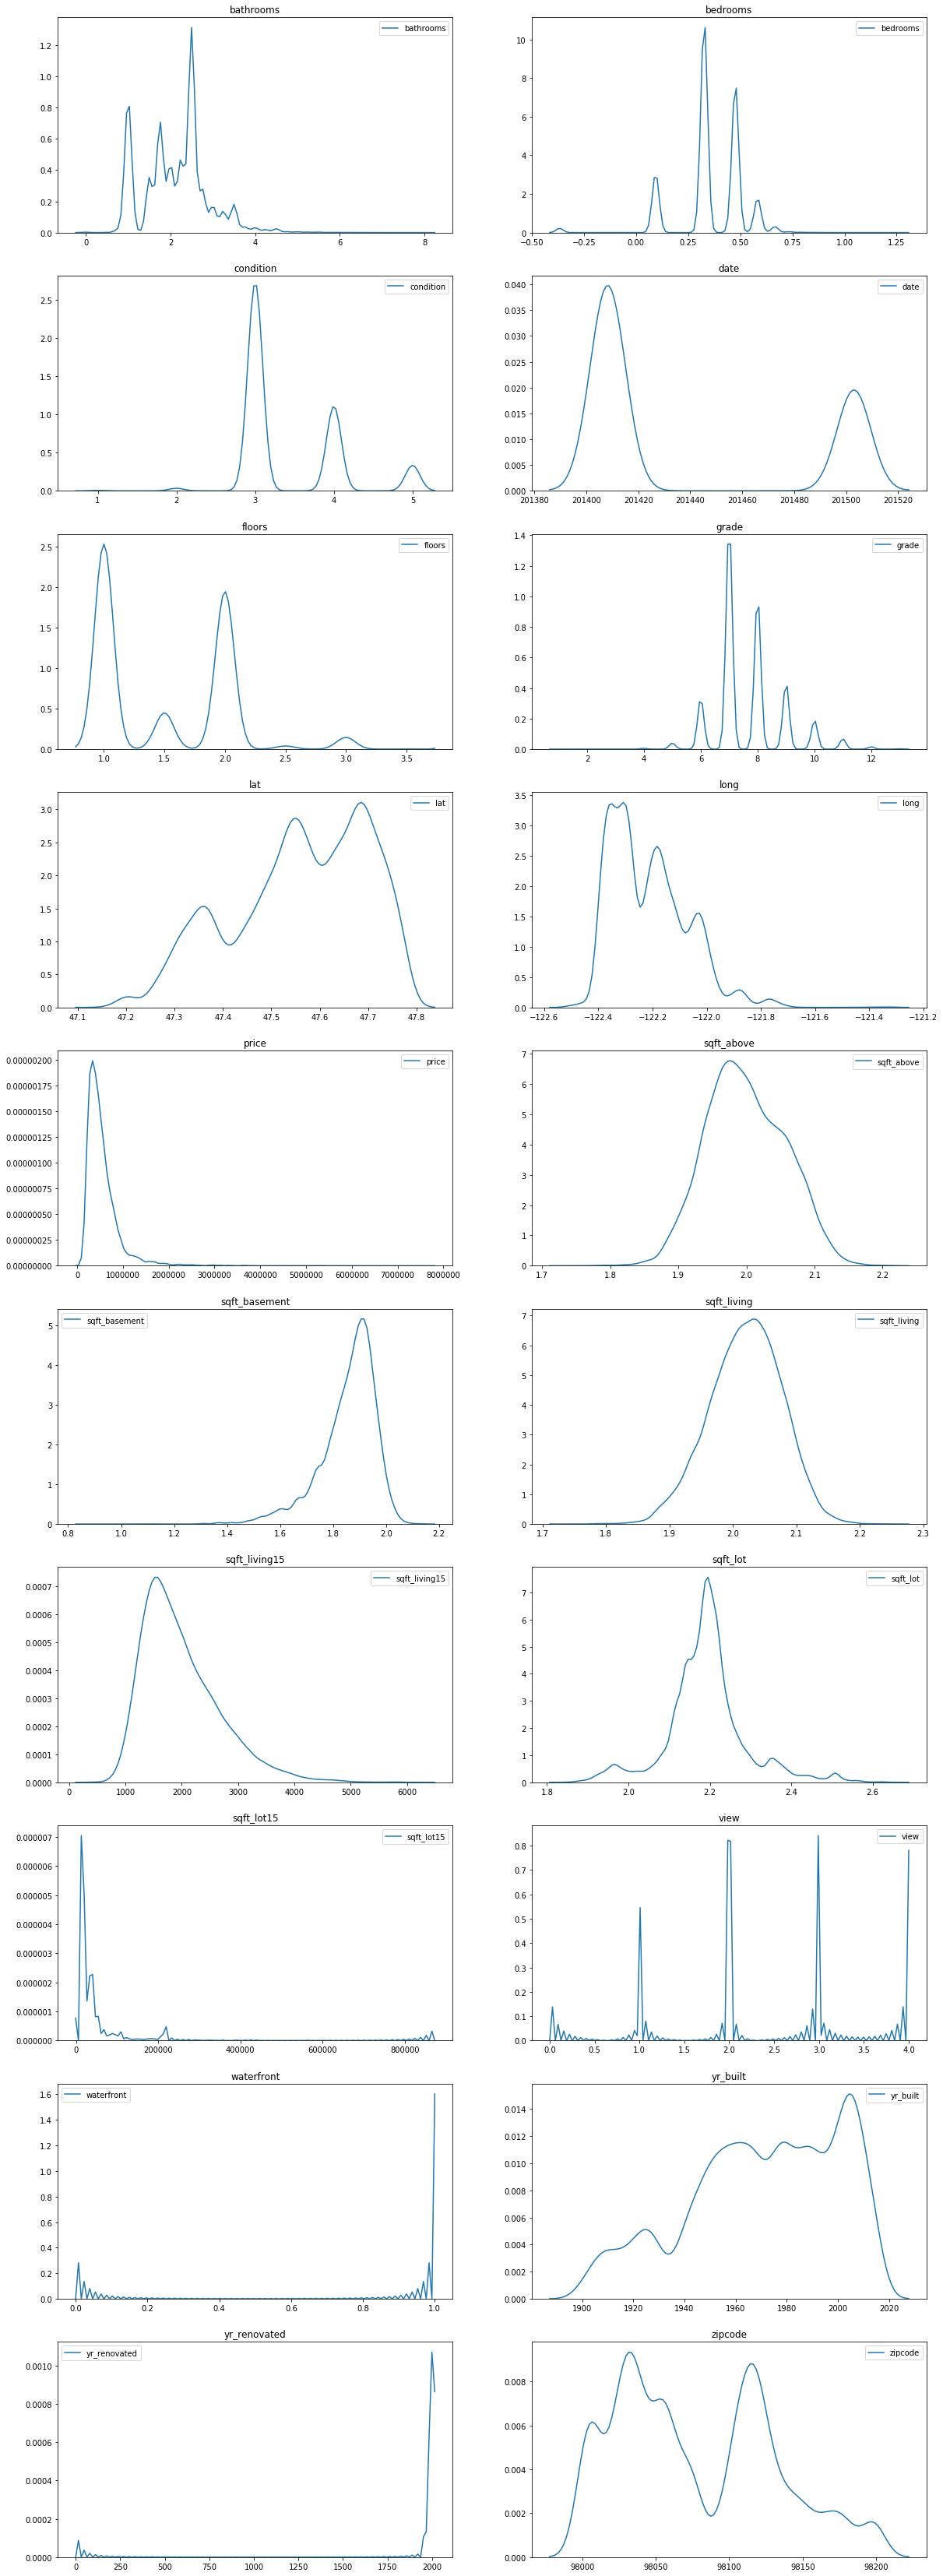

In [37]:
fig, ax= plt.subplots(10,2, figsize=(20,60))

count=0
columns=data.columns
for row in range(10):
    for col in range(2):
        sns.kdeplot(data[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count])
        count+=1

### Average Blending

In [62]:
import xgboost as xgb
import lightgbm as lgb

In [80]:
gboost=GradientBoostingRegressor(random_state=2019)
xgboost=xgb.XGBRegressor(random_state=2019)
lightgbm=lgb.LGBMRegressor(random_state=2019)


In [88]:
from sklearn.model_selection import cross_val_score, KFold

In [89]:

models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}]
# models={'name': ["GradientBoosting", "XGBoost", "LightGBM"],
#         'model': [gboost, xgboost, lightgbm]}

In [93]:
x=data.iloc[:train_len, :]

In [94]:
def get_cv_score(models):
    kfold = KFold(n_splits=5, random_state=2019).get_n_splits(x.values)

    for i in models:
        print("Model {} CV score: {:.4f}".format(i['name'],np.mean(cross_val_score\
                                                (i['model'],x.values,y)), kf=kfold))

In [95]:
get_cv_score(models)

Model GradientBoosting CV score: 0.8574
[22:38:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:38:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:38:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model XGBoost CV score: 0.8544
Model LightGBM CV score: 0.8748
